In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from tqdm.autonotebook import tqdm
import wandb

/usr0/home/sgururaj/miniconda3/envs/amr/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
pd.options.display.max_rows = 150

In [3]:
api = wandb.Api(timeout=20)

In [4]:
filters = {
    "state": "finished"
}

# runs = api.runs("flow-graphs-cmu/flow_graphs-code", filters=filters)


## re-run risec and chemu
# sweeps = [
#     "zt62jnek", # RISEC multiseed, all. fewshot 1-10
#     "2fvdobq5", #  RISEC single seed, fewshot 1-10
#     "v57twc84", # RISEC AMR only, multiseed, fewshot 1-10
#     "cb3sa5r1", # Chemu multiseed, AMR only. fewshot 1-50. 
#     "d7163mab" # Chemu multiseed, all. fewshot 1-50
# ]

# from-scratch sweep
sweeps = ["f3e2njl9", "k096t5ky"]


runs = []
for sweep_id in sweeps:
    sweep = api.sweep(f"flow-graphs-cmu/narrative-flow-simplified/{sweep_id}")
    runs.extend(sweep.runs)

In [5]:
df_dicts = []

for run in tqdm(runs):
    try:
        test_f1  = run.history(keys=["test_f1"], pandas=False)[0]["test_f1"]
        df_dicts.append({**run.config, "test_f1": test_f1})
    except:
        continue

results_df = pd.DataFrame(df_dicts)

  0%|          | 0/120 [00:00<?, ?it/s]

In [6]:
results_df

,lr,amr,dep,gnn,gpu,case,mode,seed,domain,epochs,...,gnn_depth,omit_rels,batch_size,bert_model,max_seq_len,src_dataset,tgt_dataset,node_emb_dim,num_neighbors,test_f1
0,0.00002,1,1,rgcn,0,amr,train,0,src,30,...,4,,16,bert-base-uncased,512,risec,mscorpus,768,2,0.867722
1,0.00002,1,1,rgcn,0,amr,train,0,src,30,...,4,,16,bert-base-uncased,512,risec,japflow,768,2,0.804877
2,0.00002,1,1,rgcn,0,amr,train,0,src,30,...,4,,16,bert-base-uncased,512,risec,mscorpus,768,2,0.862924
3,0.00002,1,1,rgcn,0,amr,train,0,src,30,...,4,,16,bert-base-uncased,512,risec,japflow,768,2,0.723903
4,0.00002,1,1,rgcn,0,amr,train,0,src,30,...,4,,16,bert-base-uncased,512,risec,mscorpus,768,2,0.785573
5,0.00002,1,1,rgcn,0,amr,train,0,src,30,...,4,,16,bert-base-uncased,512,risec,japflow,768,2,0.682119
6,0.00002,1,1,rgcn,0,amr,train,0,src,30,...,4,,16,bert-base-uncased,512,risec,mscorpus,768,2,0.651087
7,0.00002,1,1,rgcn,0,amr,train,0,src,30,...,4,,16,bert-base-uncased,512,risec,japflow,768,2,0.562105
8,0.00002,1,1,rgcn,0,amr,train,0,src,30,...,4,,16,bert-base-uncased,512,risec,mscorpus,768,2,0.479941
9,0.00002,1,1,rgcn,0,amr,train,0,src,30,...,4,,16,bert-base-uncased,512,risec,japflow,768,2,0.310261


In [48]:
dataset_name_mapping = {
    "risec": "RISeC",
    "japflow": "English Flow Graphs",
    "chemu": "Chemical Patents",
    "mscorpus": "Materials Science",
}

In [12]:
results_df.shape

(90, 22)

In [37]:
results_df.groupby(["src_dataset", "tgt_dataset", "fewshot", "case"])["test_f1"].aggregate(["count", "mean", df_range])

count      mean  df_range
src_dataset tgt_dataset fewshot case                                
risec       japflow     0.01    amr            3  0.301769  0.110652
                                dep            3  0.316105  0.051352
                                plaintext      3  0.285327  0.062749
                        0.05    amr            3  0.555202  0.051683
                                dep            3  0.567615  0.059949
                                plaintext      3  0.546540  0.079769
                        0.10    amr            3  0.641146  0.103016
                                dep            3  0.646668  0.090951
                                plaintext      3  0.640483  0.079732
                        0.20    amr            3  0.701170  0.060636
                                dep            3  0.724348  0.058459
                                plaintext      3  0.711657  0.068419
                        0.50    amr            3  0.795020  0.021681
                                dep            3  0.797373  0.044797
                                plaintext      3  0.803314  0.032783
            mscorpus    0.01    amr            3  0.495074  0.158105
                                dep            3  0.512420  0.114110
                                plaintext      3  0.459331  0.105050
                        0.05    amr            3  0.717143  0.103007
                                dep            3  0.711663  0.075413
                                plaintext      3  0.703732  0.105495
                        0.10    amr            3  0.809177  0.042073
                                dep            3  0.800042  0.055950
                                plaintext      3  0.812236  0.052003
                        0.20    amr            3  0.851822  0.022287
                                dep            3  0.853640  0.020416
                                plaintext      3  0.850195  0.022291
                        0.50    amr            3  0.869947  0.004496
                                dep            3  0.871052  0.007900
                                plaintext      3  0.853103  0.016117

In [33]:
def df_range(df):
    return df.max() - df.min()

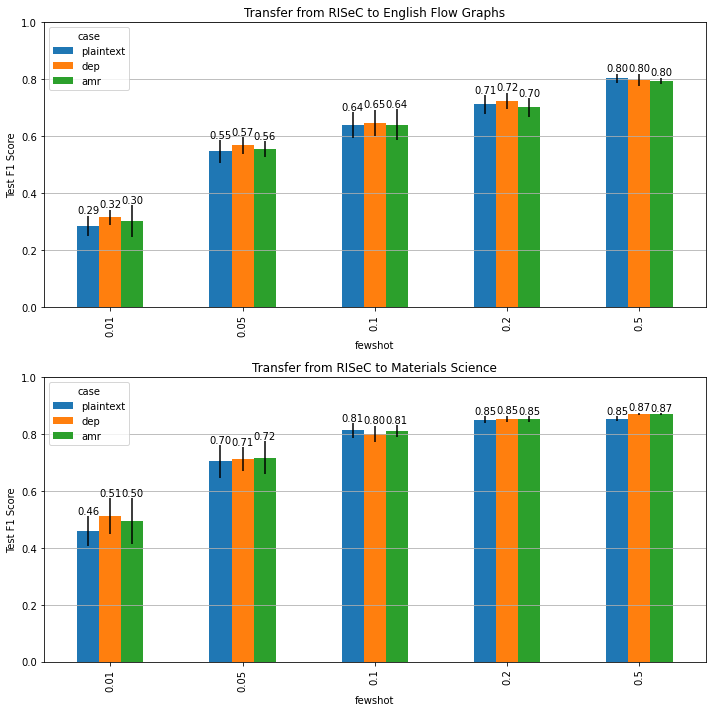

In [50]:
src_datasets = set(results_df["src_dataset"])
tgt_datasets = set(results_df["tgt_dataset"])

fig, axes = plt.subplots(len(tgt_datasets),len(src_datasets), figsize=(len(src_datasets) * 10, len(tgt_datasets) * 5), tight_layout=True)
ax_iter = iter(axes.reshape([-1]))

for src_dataset in sorted(src_datasets):
    for tgt_dataset in sorted(tgt_datasets):
        ax = next(ax_iter)
        ax.set_title(f"Transfer from {dataset_name_mapping[src_dataset]} to {dataset_name_mapping[tgt_dataset]}")
        ax.set_ylim(0, 1)
        ax.set_xlabel("Fewshot Setting")
        ax.set_ylabel("Test F1 Score")
        if src_dataset == tgt_dataset:
            continue
        results_viz = results_df[(results_df["src_dataset"] == src_dataset) & (results_df["tgt_dataset"] == tgt_dataset)].groupby(["fewshot", "case"])["test_f1"].aggregate(["mean", "std"]).unstack(1)       
        graph = results_viz["mean"][["plaintext", "dep", "amr"]].plot.bar(ax=ax, yerr=results_viz["std"])
        graph.grid(axis="y", which="both")

        for bars in ax.containers:
            try:
                ax.bar_label(bars, fmt="%2.2f")
            except:
                pass
